In [33]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, roc_auc_score
import warnings
warnings.filterwarnings('ignore')
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt
import os
import joblib


In [34]:
#1. Temizlenmiş veriyi yükle
data_path = '../data/processed/cleaned_dataset.csv'
df = pd.read_csv(data_path)

In [35]:
df

,Gender,Age,Profession,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Student,5.0,8.97,2.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Student,2.0,5.90,5.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Student,3.0,7.03,5.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Student,3.0,5.59,2.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Student,4.0,8.13,3.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27868,Female,27.0,Student,5.0,5.75,5.0,5-6 hours,Unhealthy,Class 12,Yes,7.0,1.0,Yes,0
27869,Male,27.0,Student,2.0,9.40,3.0,Less than 5 hours,Healthy,MSc,No,0.0,3.0,Yes,0
27870,Male,31.0,Student,3.0,6.61,4.0,5-6 hours,Unhealthy,MD,No,12.0,2.0,No,0
27871,Female,18.0,Student,5.0,6.88,2.0,Less than 5 hours,Healthy,Class 12,Yes,10.0,5.0,No,1


In [36]:
# Kategorik sütunları encode et ve mappingleri göster
label_encoders = {}
df_encoded = df.copy()

for col in df_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

# Kodlama eşlemelerini yazdır
for col, le in label_encoders.items():
    print(f"Sütun: {col}")
    for i, class_ in enumerate(le.classes_):
        print(f"  {class_} -> {i}")
    print("-" * 30)


Sütun: Gender
  Female -> 0
  Male -> 1
------------------------------
Sütun: Profession
  Architect -> 0
  Chef -> 1
  Civil Engineer -> 2
  Content Writer -> 3
  Digital Marketer -> 4
  Doctor -> 5
  Educational Consultant -> 6
  Entrepreneur -> 7
  Lawyer -> 8
  Manager -> 9
  Pharmacist -> 10
  Student -> 11
  Teacher -> 12
  UX/UI Designer -> 13
------------------------------
Sütun: Sleep Duration
  5-6 hours -> 0
  7-8 hours -> 1
  Less than 5 hours -> 2
  More than 8 hours -> 3
  Others -> 4
------------------------------
Sütun: Dietary Habits
  Healthy -> 0
  Moderate -> 1
  Others -> 2
  Unhealthy -> 3
------------------------------
Sütun: Degree
  B.Arch -> 0
  B.Com -> 1
  B.Ed -> 2
  B.Pharm -> 3
  B.Tech -> 4
  BA -> 5
  BBA -> 6
  BCA -> 7
  BE -> 8
  BHM -> 9
  BSc -> 10
  Class 12 -> 11
  LLB -> 12
  LLM -> 13
  M.Com -> 14
  M.Ed -> 15
  M.Pharm -> 16
  M.Tech -> 17
  MA -> 18
  MBA -> 19
  MBBS -> 20
  MCA -> 21
  MD -> 22
  ME -> 23
  MHM -> 24
  MSc -> 25
  Others -

In [37]:
df_encoded

,Gender,Age,Profession,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,1,33.0,11,5.0,8.97,2.0,0,0,3,1,3.0,1.0,0,1
1,0,24.0,11,2.0,5.90,5.0,0,1,10,0,3.0,2.0,1,0
2,1,31.0,11,3.0,7.03,5.0,2,0,5,0,9.0,1.0,1,0
3,0,28.0,11,3.0,5.59,2.0,1,1,7,1,4.0,5.0,1,1
4,0,25.0,11,4.0,8.13,3.0,0,1,17,1,1.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27868,0,27.0,11,5.0,5.75,5.0,0,3,11,1,7.0,1.0,1,0
27869,1,27.0,11,2.0,9.40,3.0,2,0,25,0,0.0,3.0,1,0
27870,1,31.0,11,3.0,6.61,4.0,0,3,22,0,12.0,2.0,0,0
27871,0,18.0,11,5.0,6.88,2.0,2,0,11,1,10.0,5.0,0,1


In [38]:
# 4. Özellik ve hedef değişkenlerini ayırma
X = df_encoded.drop('Depression', axis=1)
y = df_encoded['Depression']

In [39]:
# Veriyi ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [40]:
# Ölçekleme
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
models = {
    'Logistic Regresasion': {
        'model': LogisticRegression(),
        'params': {'C': [0.01, 0.1, 1, 10]}
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'params': {'max_depth': [3, 5, 10, None]}
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {'n_estimators': [50, 100], 'max_depth': [5, 10, None]}
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {'n_neighbors': [3, 5, 7]}
    },
    'SVM': {
        'model': SVC(),
        'params': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    },
    'Gradient Boosting': {
        'model': GradientBoostingClassifier(),
        'params': {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1, 0.2]}
    },
    'XGBoost': {
        'model': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        'params': {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1, 0.2]}
    },
    'LightGBM': {
        'model': LGBMClassifier(),
        'params': {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1, 0.2]}
    },
    'AdaBoost': {
        'model': AdaBoostClassifier(),
        'params': {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1, 0.2]}
    },
}

In [42]:
results = []

for name, mp in models.items():
    print(f"Training {name}...")
    grid = GridSearchCV(mp['model'], mp['params'], cv=3, scoring='f1', n_jobs=-1)
    grid.fit(X_train, y_train)
    
    y_pred = grid.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results.append({
        'Model': name,
        'Best Params': grid.best_params_,
        'Accuracy': acc,
        'F1 Score': f1,
        'Best Estimator': grid.best_estimator_
    })
    
    print(f"{name} -> Accuracy: {acc:.4f}, F1 Score: {f1:.4f}")
    print('-'*40)


Training Logistic Regresasion...
Logistic Regresasion -> Accuracy: 0.8459, F1 Score: 0.8701
----------------------------------------
Training Decision Tree...
Decision Tree -> Accuracy: 0.8240, F1 Score: 0.8506
----------------------------------------
Training Random Forest...
Random Forest -> Accuracy: 0.8409, F1 Score: 0.8666
----------------------------------------
Training KNN...
KNN -> Accuracy: 0.8300, F1 Score: 0.8577
----------------------------------------
Training SVM...
SVM -> Accuracy: 0.8461, F1 Score: 0.8707
----------------------------------------
Training Gradient Boosting...
Gradient Boosting -> Accuracy: 0.8488, F1 Score: 0.8725
----------------------------------------
Training XGBoost...
XGBoost -> Accuracy: 0.8441, F1 Score: 0.8682
----------------------------------------
Training LightGBM...
[LightGBM] [Info] Number of positive: 13061, number of negative: 9237
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000218 seconds.
Yo

In [43]:

# 8. En iyi modeli bul
results_df = pd.DataFrame(results)
best_idx = results_df['F1 Score'].idxmax()

best_model_name = results_df.loc[best_idx, 'Model']
best_params = results_df.loc[best_idx, 'Best Params']
final_model = results_df.loc[best_idx, 'Best Estimator']

print(f"\nBest Model: {best_model_name} with F1 Score: {results_df.loc[best_idx, 'F1 Score']:.4f}")
print(f"Best Params: {best_params}")


Best Model: Gradient Boosting with F1 Score: 0.8725
Best Params: {'learning_rate': 0.1, 'n_estimators': 100}



Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.80      0.81      2310
           1       0.86      0.88      0.87      3265

    accuracy                           0.85      5575
   macro avg       0.85      0.84      0.84      5575
weighted avg       0.85      0.85      0.85      5575



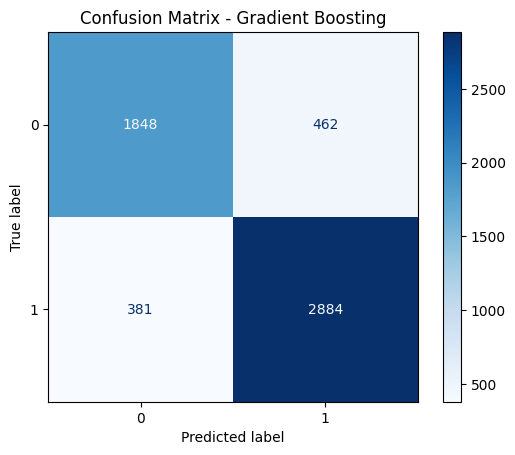

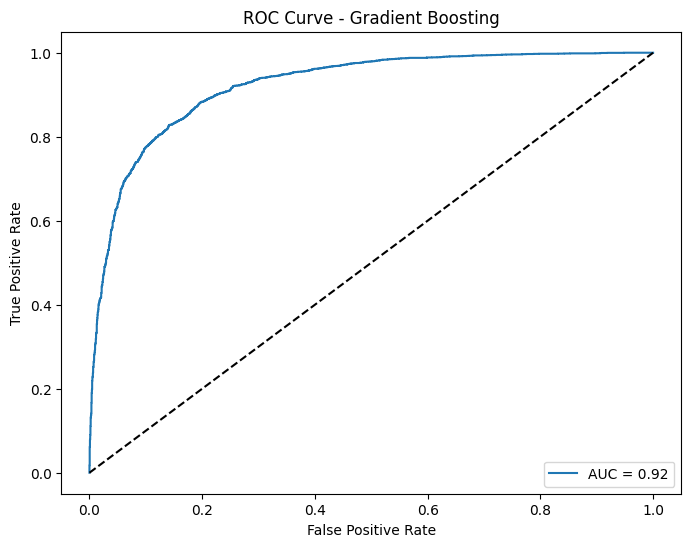

In [44]:
# 9. Final model ile test verisi üzerinde değerlendirme yap
y_final_pred = final_model.predict(X_test)
print("\nClassification Report:\n")
print(classification_report(y_test, y_final_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_final_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=final_model.classes_)
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix - {best_model_name}')
plt.show()

# ROC Curve & AUC 
try:
    y_probs = final_model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    auc = roc_auc_score(y_test, y_probs)
    
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {best_model_name}')
    plt.legend(loc='lower right')
    plt.show()
except AttributeError:
    print("ROC curve çizimi için predict_proba desteklenmiyor bu modelde.")
